# Statistical Significance

Slides [aquí](https://docs.google.com/presentation/d/10jV-CsgaaGv2F7H_gZnkz5_eVyVmqKLrc1rf26e2aDY/edit#slide=id.p1)

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [23]:
from functions_pkg import print_vif

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

## Warm Up! 🥵

### 🥵#1

* How do we evaluate scedasticity and why is it important to make sure this assumption is met in linear modeling?
  * What even is scedasticity? `________________`
  * Do we want to have homoscedasticity or heteroscedasticity `________________`
  * In the below cell... plot `X` with `y1` and `X` with `y2`.  Which one do you think is homoscedastic? heteroscedastic? `________________`
  * What about something more formal than this eyeball test?

In [16]:
# set seed for reproducible random stuff
# Just generating some data to play with
np.random.seed(42)

n = 100
X = np.arange(n)
y1 = X + np.random.normal(0, 10, size=n)
y2 = X + np.random.normal(0, X ** 0.75)

<IPython.core.display.Javascript object>

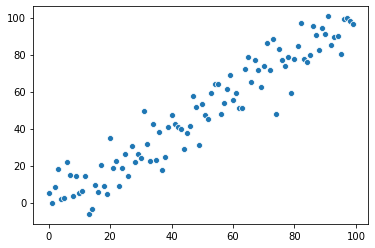

<IPython.core.display.Javascript object>

In [8]:
# plot X with y1
sns.scatterplot(X, y1)
plt.show()

> residuals are homoscedastic

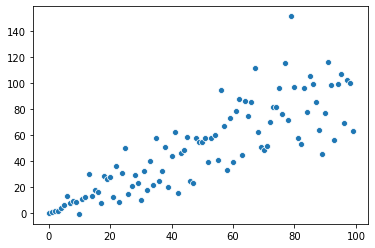

<IPython.core.display.Javascript object>

In [9]:
# plot X with y2
sns.scatterplot(X, y2)
plt.show()

> residuals look to be heteroscedastic

In [17]:
X = X.reshape(-1, 1)

<IPython.core.display.Javascript object>

In [18]:
# What about something more formal than this eyeball test?
# Fit a model for X to predict y1
model_1 = LinearRegression()
model_1.fit(X, y1)

LinearRegression()

<IPython.core.display.Javascript object>

In [19]:
# Fit a model for X to predict y2
model_2 = LinearRegression()
model_2.fit(X, y2)

LinearRegression()

<IPython.core.display.Javascript object>

In [20]:
# Residuals are what we call the mistakes
# residual = prediction - actual
y1_residuals = model_1.predict(X) - y1
y2_residuals = model_2.predict(X) - y2

<IPython.core.display.Javascript object>

In [21]:
# Documenation: https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html
# Null hypothesis is homoscedastic
X_const = sm.add_constant(X)
_, p1, _, _ = sms.het_breuschpagan(y1_residuals, X_const)
_, p2, _, _ = sms.het_breuschpagan(y2_residuals, X_const)

print(p1)
print(p2)

0.6013945776291625
0.0009785352144070596


<IPython.core.display.Javascript object>

### 🥵 #2

* How do we evaluate for multicollinearity and why is this assumption important?
  * What even is multicollinearity? `________________`
  * Do we want to have multicollinearity or no multicollinearity? `________________`
  * In the below cell... Does `X` contain significant multicollinearity?
  * When creating dummies/one-hot-encoded variables, what do we need to do to avoid multicolinearararity?

In [25]:
# set seed for reproducible random stuff
np.random.seed(42)

n = 20
x1 = np.arange(n)
x2 = np.random.normal(size=n)
x3 = 2 * np.arange(n) + np.random.normal(0, 1, n)
X = pd.concat((pd.Series(x) for x in [x1, x2, x3]), axis=1)
X.columns = ["x1", "x2", "x3"]

<IPython.core.display.Javascript object>

In [26]:
# Does X contain significant multicollinearity?
print_vif(X)

VIF results
-------------------------------
const      5.074372
x1       169.655508
x2         1.869569
x3       177.519575
dtype: float64
-------------------------------



<IPython.core.display.Javascript object>

## t-tests again!! 🎉

I can feel the excitement bubbling up in you all just writing this... I know, I missed them too.

Let's look more at this $t$ distribution to start.  We didn't really do that before.

* Generate a t distribution with `np.random._______`.
    * Use a large-ish sample size
    * Play with the value of the degrees of freedom parameter (From the slide: "more degrees of freedom means closer to the normal distribution")
    

In [27]:
# set seed for reproducible random stuff
np.random.seed(42)

# Generate a t distribution with an np.random function and plot
n = 1000

x = ______
plt.hist(x)
plt.show()

TypeError: standard_t() takes at least 1 positional argument (0 given)

<IPython.core.display.Javascript object>

* What's the null hypothesis in a t-test?
* When do we reject this null hypothesis?

Below are the average heights (in cm) by sex in USA according to [this big ole report](https://www.cdc.gov/nchs/data/series/sr_03/sr03_039.pdf) that I really found from [this wikipedia page](https://en.wikipedia.org/wiki/Average_human_height_by_country); the info also gives the sample size and standard deviation.

* Generate random normal samples using this information.
* Plot overlaid histograms of these samples you generated.

In [ ]:
male_n = 5232
male_avg = 175.3
male_sd = 15.2

female_n = 5547
female_avg = 161.5
female_sd = 15.2

# Generate random normal samples using this information.
np.random.seed(42)
female_height = _____
male_height = _____

# Plot overlaid histograms of these samples you generated.
_____
_____
plt.show()

According to the histograms (and the average) men are taller.  Is this difference significant?

What if we had biased samples?? What is a biased sample??

Let's say we took a random sample of women and only ended up with WNBA players (not likely with a random sample, but the beauty of randomness is that it's possible, some things are just unlikely).  Below is the average height for WNBA players according to [reference.com](https://www.reference.com/world-view/average-height-wnba-player-a3cf4bccebffecfb); also is the number of WNBA players according to the [New York Times](https://www.nytimes.com/2018/05/05/sports/wnba-los-angeles-sparks.html).

Let's say our sample of men ended up with only marathon runners.  Below is the average height for top 100 male marathon runners according to [runnersworld.com](https://www.runnersworld.com/news/a20855134/great-marathoners-over-six-feet-tall-are-rare/).  

Use the same standard deviations from before and:
* generate some more normal distributions
* re-plot
* re-ttest

In [ ]:
wnba_avg = 180.3
wnba_n = 144

marathon_avg = 169.92
marathon_n = 100

# generate some more normal distributions

# re-plot

# re-test


We conclude the opposite! Kinda forced us into this.. but! This is the whole idea about the p-value and the typical 5% cutoff.  The p-value is trying to help us differentiate from results that occur purely from chance related to sampling.  AKA every p-value is trying to protect against the chance that you're comparing WNBA players and marathoners when you want to be comparing women and men.  AKA a p-value is the probability that random chance generated differences that you're seeing in the data.

When we reject the null at the 5% level we're still saying there's a 5% chance these results happened due to sampling bias.  Typically 5% is pretty good in practice; here we forced the issue and got a reallllly unlikely sample to happen randomly.

## Regression and t-tests!

So why are we talking about t-tests?  I thought this was a linear regression class?

This is how we test if a predictor is 'significant'.  In a business context maybe we discover that our company's number of hours worked isn't a significant predictor of success; with that information we could argue that taking next Monday off isn't such a bad thing.

Enough about stats and business, lets get back to some snails.

* With the imported abalone dataset
  * Use `Whole_Weight` and `Diameter` as the predictors and `Rings` as the target.
  * Build a regression model using `statsmodels`
  * Print the model summary
* Use the output to identify if any of the predictors are significant.  Which ones are if any? `____________`

In [ ]:
cols = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_Weight",
    "Shucked_Weight",
    "Visecra_Weight",
    "Shell_Weight",
    "Rings",
]
abalone = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1GwCnxFT4Sd6iZDj07kNNhEREr7OJQnGvtxd67b5AMio/export?format=csv",
    names=cols,
)

In [ ]:
# Use `Whole_Weight` and `Diameter` as the predictors
X = abalone[["Whole_Weight", "Diameter"]]

# `Rings` as the target
y = abalone["Rings"]

# Build a regression model using `statsmodels`

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Print the model summary
model.summary()

Note that `sklearn` agrees

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

weight_coef, diameter_coef = model.coef_
print(weight_coef, diameter_coef)

NameError: name 'X_train' is not defined

<IPython.core.display.Javascript object>

We can recreate this output by 'bootstrapping' our data, fitting a model to each bootstrapped sample and seeing how the coefficients change.

In [ ]:
np.random.seed(42)

data = abalone[["Whole_Weight", "Diameter", "Rings"]]

weight_coefs = []
diameter_coefs = []
for i in range(1000):
    sample = abalone.sample(frac=1.0, replace=True)
    X = sample[["Whole_Weight", "Diameter"]]
    y = sample["Rings"]

    model = LinearRegression()
    model.fit(X, y)

    weight_coef, diameter_coef = model.coef_

    weight_coefs.append(weight_coef)
    diameter_coefs.append(diameter_coef)

In [ ]:
weight_ci_lo = np.percentile(weight_coefs, 2.5)
weight_ci_hi = np.percentile(weight_coefs, 97.5)

print("Weight Coefficient CI")
weight_ci_lo, weight_ci_hi

In [ ]:
diameter_ci_lo = np.percentile(diameter_coefs, 2.5)
diameter_ci_hi = np.percentile(diameter_coefs, 97.5)

print("Diameter Coefficient CI")
diameter_ci_lo, diameter_ci_hi

* Plot histograms for the coefficient sampling distributions
* Add lines for the ci bounds

-----
## Afternoon

Let's start model Rings from scratch.  We won't restrict ourselves on the features we can use.  Everything is fair game. Readyyyy.. go

------

Let's rebuild our model and use an *interaction term* (\**gasp*\*).  Let's go back to using only `'Whole_Weight'` and `'Diameter'`.  After creating the `X` and `y`:

* Create a new feature that captures the interaction between our current 2 predictors
  * Multiply the 2 features together and assign this to a new column
* Rebuild the model using the 3 features
* Re-print the summary
* Interpret the t-tests for these coefficients

In [ ]:
# Define X (['Whole_Weight', 'Diameter']) and y ('Rings')


In [ ]:
# Create a new feature that captures the interaction between our current 2 predictors
X["ww_d_interaction"] = _____

# Build a regression model using `statsmodels`
____

# Print the model summary
____

Wait, what did we just do?

In [ ]:
# No need to worry about this code for needs today.
# Of course, give it a look if you're curious.

# its easier to see if we bin we'll bin weight and then a model
# for diameter when within each bin of weight
def bin_array(x, n_bins=5):
    percentiles = np.linspace(0, 100, n_bins + 1)[:-1]
    bins = np.percentile(x, percentiles)
    binned = np.digitize(x, bins)
    return binned


abalone["binned_weight"] = bin_array(abalone["Whole_Weight"])
bins = abalone["binned_weight"].unique()
for b in bins:
    subset = abalone[abalone["binned_weight"] == b]

    # if we have only 1 row we wont fit a model
    if subset.shape[0] <= 1:
        continue

    X = subset["Diameter"]
    y = subset["Rings"]

    X_const = sm.add_constant(X)
    y_pred = sm.OLS(y, X_const).fit().predict()

    lab = f"Weight: Bin {b}"
    plt.plot(X, y_pred, label=lab, lw=4)
    ## (un)comment below to toggle plotting on same axes
    plt.scatter(X, y, label=lab, alpha=0.1)
    plt.show()


plt.xlabel("Diameter")
plt.ylabel("Rings")
plt.title("Interaction between Diameter and Weight")
plt.legend()
plt.show()

So what do we see here? How Diameter affects Rings depends on how heavy our snail is! When our snail is lighter a higher diameter means more Rings.  When we go up in weight we start to see this trend taper off, at a certain weight diameter starts to matter less for predicting rings! In other words the effects of diameter and weight interact with each other.